torch.Size([5022, 16])
torch.Size([5022, 1])
Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): SiLU()
    (4): Linear(in_features=32, out_features=1, bias=True)
  )
)
Model accuracy: 0.00%


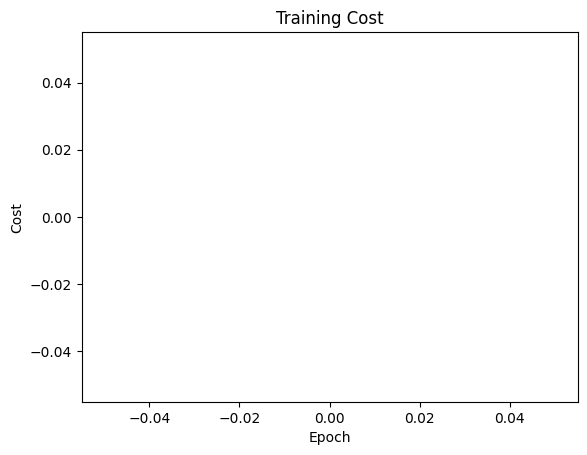

In [21]:
import os
import torch
import pandas as pd

import torch.nn as nn
import torch.optim as optim

from torch import nn
from torch import optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import torch.nn.functional as F

import matplotlib.pyplot as plt

#----------------------------------------

# Read data, convert to NumPy arrays
data = pd.read_csv("LIDAR.csv", header=None)
X = data.iloc[:, 0:16].values
y = data.iloc[:, 16].values

# convert into PyTorch tensors
trainingSetX = torch.tensor(X, dtype=torch.float32)
trainingSetY = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

#----------------------------------------

print(trainingSetX.shape)
print(trainingSetY.shape)

#----------------------------------------

device = (

    "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"

)

#----------------------------------------

print(f"Using {device} device")

#----------------------------------------

class NeuralNetwork(nn.Module):
    
    def __init__(self, inputs, outputs):
        
        super().__init__()
        
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(inputs, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.SiLU(),
            nn.Linear(32, outputs),
            # nn.ReLU()
            # nn.Sigmoid() 
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits
        
#         # Simple linear connections
#         self.inOut = nn.Linear(inputs, 9)
#         # self.inOut = nn.ReLU()
#         self.hidden = nn.Linear(9, 9)
#         # self.hidden = nn.ReLU()
#         self.hidden1 = nn.Linear(9, outputs)
#         # self.hidden1 = nn.ReLU()

# #     def forward(self, x):
# #         return self.inOut(x)

#     def forward(self, x):
#         z = self.inOut(x)
#         z2 = self.hidden(z)
#         return self.hidden1(z2)
  

  
# #----------------------------------------

epochs = 50

learningRate = 0.0008

#----------------------------------------

# Simplest possible network: 9 inputs and 1 output (binary: 0 when < 0.5 and 1 when > 0.5)
model = NeuralNetwork(16, 1)

print(model)

#----------------------------------------

losses = []

# Take binary cross entropy as loss function (one output interpreted as binary)
# lossFunction = nn.BCELoss()
lossFunction = nn.MSELoss()

# Use stochastic gradient descent as optimizer, use weights and biases of model
gradientDescent = torch.optim.SGD(model.parameters(), lr=learningRate)
# gradientDescent = torch.optim.RMSprop(model.parameters(), lr=learningRate)

#----------------------------------------

for i in range(epochs):
    
    epoch_loss = 0.0
    
    for x, y in zip(trainingSetX, trainingSetY):
    
        # Reset the gradient delta's (dw, db)
        gradientDescent.zero_grad()

        # Forward step
        yhat = model(x)

        # # Compute loss
        loss = lossFunction(yhat, y)
        
        # Keep track of loss
        epoch_loss += loss.item()
        
        # losses.append(loss.item())

        # Apply gradient descent (via backpropagation)
        loss.backward()

        # Use w += -step * dw * learnRate
        gradientDescent.step()
        
    # Save loss for this epoch
    losses.append(epoch_loss / len(trainingSetX))

#----------------------------------------

# evaluate accuracy after training
model.eval()
y_pred = model(trainingSetX)
acc = (y_pred.round() == trainingSetY).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))

#----------------------------------------
#torch.save(model.linear_relu_stack, "Model2.pth")

fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

plt.plot([x for x in range(epochs)], losses, 'red')
plt.show()

#----------------------------------------
filehandler = open('SDCar_lidar.pth', 'wb')
torch.save(model.linear_relu_stack, filehandler)

In [22]:
# import os
# import torch
# import pandas as pd

# from torch import nn
# from torch import optim
# from torch.utils.data import Dataset, DataLoader
# from sklearn.model_selection import train_test_split

# import torch.nn.functional as F
# import pickle as pkl
# import matplotlib.pyplot as plt
# import time

# #----------------------------------------

# # Read data, convert to NumPy arrays
# data = pd.read_csv("LIDAR.csv", header=None)
# X = data.iloc[:, 0:16].values
# y = data.iloc[:, 16].values

# # convert into PyTorch tensors
# trainingSetX = torch.tensor(X, dtype=torch.float32)
# trainingSetY = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# #----------------------------------------

# print(trainingSetX.shape)
# print(trainingSetY.shape)

# #----------------------------------------

# #----------------------------------------


# # nds = 12

# class NeuralNetwork(nn.Module):
    
#     def __init__(self, inputs, outputs):
        
#         super().__init__()
        
#         # Simple linear connections
#         self.linear_relu_stack = nn.Sequential(
#             nn.Linear(inputs, 64),
#             nn.ReLU(),
#             nn.Linear(64, 32),
#             nn.ReLU(),
#             nn.Linear(32, 16),
#             nn.ReLU(),
#             nn.Linear(16, 8),
#             nn.SiLU(),
#             nn.Linear(8, outputs),
#             # nn.ReLU()
#         )
            
#     def forward(self, x):
        
#         return self.linear_relu_stack(x)


# #----------------------------------------

# #----------------------------------------

# epochs = 100

# learningRate = 0.008

# #----------------------------------------

# # Simplest possible network: 9 inputs and 1 output (binary: 0 when < 0.5 and 1 when > 0.5)
# model = NeuralNetwork(16, 1)

# print(model)

# #----------------------------------------

# losses = []

# # Take binary cross entropy as loss function (one output interpreted as binary)
# # lossFunction = nn.BCELoss()
# lossFunction = nn.MSELoss()

# # Use stochastic gradient descent as optimizer, use weights and biases of model
# gradientDescent = torch.optim.SGD(model.parameters(), lr=learningRate)
# # gradientDescent = torch.optim.RMSprop(model.parameters(), lr=learningRate)

# #----------------------------------------

# added = False

# for i in range(epochs):
    
#     added = False
    
#     for x, y in zip(trainingSetX, trainingSetY):
    
#         # Reset the gradient delta's (dw, db)
#         gradientDescent.zero_grad()

#         # Forward step
#         yhat = model(x)

#         # Compute loss
#         loss = lossFunction(yhat, y)
        
#         if not added:
            
#             added = True
        
#             # Keep track of loss
#             losses.append(loss.item())

#         # Apply gradient descent (via backpropagation)
#         loss.backward()

#         # Use w += -step * dw * learnRate
#         gradientDescent.step()

# #----------------------------------------

# # evaluate accuracy after training
# model.eval()
# y_pred = model(trainingSetX)
# acc = (y_pred.round() == trainingSetY).float().mean()
# acc = float(acc)
# print("Model accuracy: %.2f%%" % (acc*100))

# #----------------------------------------

# # Saving Model
# # filehandler = open('SDCar_LIDAR.pickle', 'wb')
# # pkl.dump(model.linear_relu_stack, filehandler)
# torch.save(model.linear_relu_stack, "Model2.pth")

# #----------------------------------------

# fig, ax = plt.subplots()
# ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

# plt.plot([x for x in range(epochs)], losses, 'red')
# plt.show()

#----------------------------------------